<a href="https://colab.research.google.com/github/Vasily95/final_project/blob/Vasily95-patch-1/%D0%97%D0%B0%D0%B5%D0%BC%D1%89%D0%B8%D0%BA%D0%B8_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
bank_rock = pd.read_csv('/datasets/data.csv')
bank_rock.head(15)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Вывод**

Выводим первые 15 строк таблицы на экран. В таблице мы видим, что некоторые столбцы будет необходимо обработать для того, чтобы позднее проводить исследование. В столбце "трудовой стаж в днях" присутствуют минусовые значения, а также некоторые значения пропущены. Такая же ситуация в столбце "доход". Позднее проверим, есть ли зависимость между этими двумя столбцами. Необходимо также проверить столбцы "дети", "пол", "образование" на наличие артефактов.   

## Шаг 2. Предобработка данных

### Обработка пропусков

In [ ]:
#bank_rock.info()
bank_rock[bank_rock['days_employed'].isnull()].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Проверяем количество пропущеннных значений в столбцах "доход" и "общий трудовой стаж". При помощи функции 'isnull()' выводим на экран пропущенные значение в столбце "общий трудовой стаж". Видим что количество пропущенных значений в обоих столбцах совпадает и сами столбцы также совпадают. Из этого можно сделать вывод, что либо клиенты намеренно не указывали свои данные, либо произошел сбой на стороне системы, и поэтому данные пропущены.

In [ ]:
median_income = bank_rock.groupby('income_type')['total_income'].transform('mean')
bank_rock['total_income'].fillna(median_income, inplace=True)
median_employ = bank_rock['days_employed'].median()
bank_rock['days_employed'] = bank_rock['days_employed'].fillna(median_employ)


Прежде всего проверяем пропущенные значения в столбцах "общий трудовой стаж" и "доход". Столбец "доход" будет нам необходим для дальнейшего исследования, поэтому убрать строки с пропусками мы не можем, т.к. это повлечет за собой искажение данных. При помощи функции 'transform()', находим среднее число для каждого типа занятости, и при помощи 'fillna()' и 'inplace=True' заполняем пропущенные поля в столбце "доход". Столбец "общий трудовой стаж" нам не понадобится, однако было решено также обработать данный столбец. Используя функцию 'median' запоняем пропущенные значения средним значением. 



In [ ]:
bank_rock['days_employed'] = bank_rock['days_employed'].abs()

Также в столбце "общий трудовой стаж" мы видим отрицательные значения, что противоречит логике. Функцией 'abs()' заменяем количество дней на положительные значения. Выводим первые 15 строк таблицы для проверки.

In [ ]:
bank_rock.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Вывод**

В данном разделе мы заполнили пропущенные значения, убрали отрицательные числа из столбца "общий трудовой стаж", подготовили столбцы для последующей обработки.

### Замена типа данных

In [ ]:
bank_rock['education'] = bank_rock['education'].str.lower()
bank_rock['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

В столбце "образование" необходимо унифицировать регистр значений, делаем это при помощи функции 'str.lower()'. После проверяем все возможные значения для данного столбца. У нас осталось 5 значений, записанные при помощи строчных букв, по которым в будущем будет удобно классифицировать таблицы.

In [ ]:
#bank_rock.info()
bank_rock['total_income']=bank_rock['total_income'].astype('int64')

In [ ]:
bank_rock['days_employed']=bank_rock['days_employed'].astype('int64')

Еще раз проверим тип данных в таблице. 
Столбцы "общий трудовой стаж" и "доход" имею тип float. С помощью функции 'astype()' заменим значения в данных столбцах на тип int для удобства в дальнейших вычислениях.

**Вывод**

В данном разделе были изменены типы данных в таблице на целые числа для дальнейших вычислений, а также унифицирован регистр для столбца "образование"

### Обработка дубликатов

In [ ]:
bank_rock['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Проверяем значения для столбца "кол-во детей", видим, что там есть два значения, которые могут быть ошибочными "-1" и "20"

In [ ]:
bank_rock.groupby('children')['family_status'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: family_status, dtype: int64

Считаем количество значений. Крайне маловероятно, что у 76 людей из выборки есть по 20 детей. Возможно при заполнении данных произошла ошибка в появлении '-' и лишнего нуля, будет необходимо их заменить на нужные значения: "1" и "2" при помощи функции "replace()".

In [ ]:
bank_rock['children'] = bank_rock['children'].replace(-1, 1)
bank_rock['children'] = bank_rock['children'].replace(20, 2)
bank_rock['children'].unique()

array([1, 0, 3, 2, 4, 5])

Проверяем новые значения с помощью функции 'unique()'

In [ ]:
#bank_rock['gender'].unique()
#bank_rock['gender'].value_counts()
bank_rock[bank_rock['gender']== 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


Рассморим столбец "пол". Вызовем функцию, для проверки всех значений. Кроме 'F' и 'M' есть еще некий 'XNA'. Проверяем количество таких строк через сокращенную функцию 'loc()'. Есть всего одна такая строка.

In [ ]:
bank_rock = bank_rock.drop(index=[10701])

При помощи функции drop(), удаляем данную строку, указывая индекс, который мы ранее нашли.

In [ ]:
#bank_rock['gender'].unique()

Выводим значения столбца "пол" повторно для проверки.

In [ ]:
bank_rock['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

Проверяем уникальные значения для столбца "возраст клиента в годах". Видим, что у некоторых клиентов заполнено число "0", что не может быть правдой.

In [ ]:
bank_rock.groupby('dob_years')['family_status'].count()


dob_years
0     101
19     14
20     51
21    111
22    183
23    254
24    263
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: family_status, dtype: int64

In [ ]:
drop_per = 101 / len(bank_rock)
print ("Доля удаляемого датасета составляет: {:.2%}".format(drop_per))

Доля удаляемого датасета составляет: 0.47%


In [ ]:
bank_rock = bank_rock.drop(bank_rock[bank_rock['dob_years'] == 0].index)

Посчитали количество строк в котором значение равно 0. Т.к. процент таких строк очень маленький, мы не можем заполнить значения средним числом за клиента, данные строки были удалены из таблицы. 

In [ ]:
bank_rock.duplicated().sum()

71

In [ ]:
bank_rock=bank_rock.drop_duplicates().reset_index(drop= True)

In [ ]:
bank_rock.duplicated().sum()

0

Проверили количество дубликатов в таблице после всех изменений, их оказалось 71. Используя фунцкию 'drop_duplicates().reset_index(drop= True)' удаляем все дубликаты, не создавая столбец со старыми значениями индексов.
Проверяем еще раз количество дубликатов функцией 'bank_rock.duplicated().sum()'


**Вывод**

В данном разделе мы удалили все значения, которые в будущем исказили бы выводы в исследовании.

### Лемматизация

In [ ]:
from pymystem3 import Mystem
m = Mystem()
bank_rock['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Вызываем функцию для проверки всех возможных значений для столбца "цель кредита". Замечаем, что в целом есть повторяющиеся значения, выраженные разными словами. Необходимо вызвать лемматизатор для слов на русском.


Сохраняем список значений столбца "цель кредита" в переменную 'word_list'. Создаем пустой список 'lems'. С помощью цикла для всех значений вызываем функцию лемматизации 'm.lemmatize()',  потом применяем ее к значениям 'word_list', выводим на экран список (lems).

In [ ]:
def purpose_short(purpose):
    
    lem_purpose=m.lemmatize(purpose)
    
    if 'жилье' in lem_purpose:
        return 'операции с недвижимостью'
    if 'недвижимость' in lem_purpose:
        return 'операции с недвижимостью'
    if 'автомобиль' in lem_purpose:
        return 'покупка автомобиля'
    if 'образование' in lem_purpose:
        return 'образование'
    if 'свадьба' in lem_purpose:
        return 'проведение свадьбы'
    return 'другое'  
    
print(purpose_short('автомобиля'))
bank_rock['new_purpose'] = bank_rock['purpose'].apply(purpose_short)
#bank_rock['purpose'].unique()
bank_rock.head(10)

покупка автомобиля


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,покупка автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью


Создаем функцию 'def purpose_short(word)', которая будет искать похожие слова в полученным списке. Прописываем условие, которое будет совпадать со словами в списке. 
Проверяем, работает ли функция корректно, после этого создаем новый столбец методом 'apply()', прописываем внутри функцию, которая будет обрабатывать старые значения и выводить новые. 
Применяем ее к таблице, выводим первые 10 строк.

**Вывод**

В данном разделе мы унифицировали множественные значения в столбце "образование", получив на выходе 4 значения, что значительно упростит нам дальнейшие наблюдения и расчеты.

### Категоризация данных

In [ ]:
bank_rock.sort_values(by = 'total_income')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_purpose
14479,0,359219,57,среднее,1,женат / замужем,0,F,пенсионер,1,20667,недвижимость,операции с недвижимостью
12918,0,369708,37,среднее,1,гражданский брак,1,M,пенсионер,0,21205,заняться высшим образованием,образование
16053,1,3642,52,среднее,1,женат / замужем,0,M,сотрудник,0,21367,приобретение автомобиля,покупка автомобиля
1590,0,359726,68,среднее,1,гражданский брак,1,M,пенсионер,0,21695,на проведение свадьбы,проведение свадьбы
14173,0,346602,61,среднее,1,женат / замужем,0,F,пенсионер,0,21895,недвижимость,операции с недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17050,0,5734,42,высшее,0,гражданский брак,1,M,компаньон,0,1711309,сыграть свадьбу,проведение свадьбы
20642,0,4719,61,среднее,1,Не женат / не замужем,4,F,сотрудник,0,1715018,покупка жилья для семьи,операции с недвижимостью
9115,1,5248,35,среднее,1,гражданский брак,1,M,сотрудник,0,1726276,дополнительное образование,образование
19451,1,2577,39,высшее,0,женат / замужем,0,M,компаньон,1,2200852,строительство недвижимости,операции с недвижимостью


<AxesSubplot:>

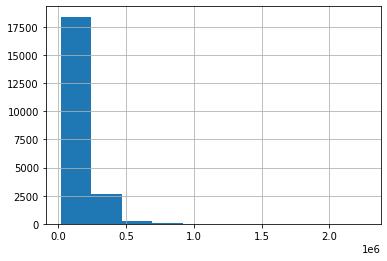

In [ ]:
bank_rock['total_income'].hist()


Отсоритируем таблицу по столбцу "доход", используя функцию 'sort_values(by =)'. Мы видим верхние и нижние значения. Также вызывем функцию гистогаммы.  Для дальнейшиего исследавания нам необходимо будем разбить данные на несколько категорий. Внесем категории 'доход ниже среднего', 'средний доход', 'доход выше среднего' и 'очень высокий доход'. С помощью функции 'def' и 'if' установим верхний и нижний пределы для каждой категории. Примерные цифры брались из гистограммы.

In [ ]:
def income_group(income):
    if 20000<=income<100000:
        return 'доход ниже среднего'
    if 100001<=income<=150000:
        return 'средний доход'
    if 150001<=income<=300000:
        return 'доход выше среднего'
    if income>300001:
        return 'очень высокий доход'
income_group (285000)

'доход выше среднего'

Проверяем корректность работы функции.

In [ ]:
bank_rock['income_int'] = bank_rock['total_income'].apply(income_group)
bank_rock.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_purpose,income_int
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью,доход выше среднего
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,покупка автомобиля,средний доход
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью,средний доход
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,доход выше среднего
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы,доход выше среднего
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью,доход выше среднего
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью,доход выше среднего
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,средний доход
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы,доход ниже среднего
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью,средний доход


При помощи функции 'apply()' применяем новые параметры на столбец "общий доход", создаем новый столбец, выводим первые 10 строк на экран.

In [ ]:
bank_rock.groupby('new_purpose')['debt'].count()

new_purpose
образование                  3995
операции с недвижимостью    10763
покупка автомобиля           4284
проведение свадьбы           2310
Name: debt, dtype: int64

Также для ответов в разделе 3 сгруппируем и посчитаем количество кредитов для каждой цели.

In [ ]:
def age_inter(age):
    if age<30:
        return 'молодежь'
    if 30<=age<=55:
        return 'взрослые'
    if age>55:
        return 'пенсионеры'
age_inter (25)


'молодежь'

In [ ]:
bank_rock['years_int'] = bank_rock['dob_years'].apply(age_inter)
bank_rock.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_purpose,income_int,years_int
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью,доход выше среднего,взрослые
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,покупка автомобиля,средний доход,взрослые
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью,средний доход,взрослые
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,доход выше среднего,взрослые
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы,доход выше среднего,взрослые
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью,доход выше среднего,молодежь
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью,доход выше среднего,взрослые
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,средний доход,взрослые
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы,доход ниже среднего,взрослые
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью,средний доход,взрослые


Теперь необходимо разбить значения в столбце "возраст клиента в годах" на категории. Выберем 3: 'молодежь', 'взрослые', 'пенсионеры'. Укажем временной интервал для каждого из них, создадим функцию 'def age_inter(age)', которая заменит данные в столбце "возраст клиента в годах"
Проверим корректность работы функции.
Выведем 10 строк таблицы

In [ ]:
def family_debt(row):
    family_status=row['family_status']
    debt=row['debt']
    if family_status == 'женат / замужем' or 'гражданский брак' or 'Не женат / не замужем' or 'вдовец / вдова':
        if debt == 1:
            return 'есть долг'
    return 'нет долга'

row_values = ['женат / замужем', 1]
row_columns = ['family_status', 'debt']
row = pd.Series(data=row_values, index=row_columns)
print(family_debt(row))


есть долг


Создадим функцию 'def family_debt(row)', которая вместо числовых значений будет возвращать значения 'нет долга', 'есть долг'.  У нас будет две переменные - "задолженность" и "семейный статус".
Проверяем корректность работы функции, вставляем значение 'женат / замужем', и  '1'.

In [ ]:
bank_rock['debt_new'] = bank_rock.apply(family_debt, axis=1)
bank_rock.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_purpose,income_int,years_int,debt_new
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью,доход выше среднего,взрослые,нет долга
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,покупка автомобиля,средний доход,взрослые,нет долга
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью,средний доход,взрослые,нет долга
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,доход выше среднего,взрослые,нет долга
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы,доход выше среднего,взрослые,нет долга
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью,доход выше среднего,молодежь,нет долга
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью,доход выше среднего,взрослые,нет долга
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,средний доход,взрослые,нет долга
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы,доход ниже среднего,взрослые,нет долга
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью,средний доход,взрослые,нет долга


Вносим новый столбец 'debt_new' в таблицу. Выводим 20 строк для проверки

**Вывод**

Подводя итоги данного раздела и учитывая характер будущих задач, я решил выделить 3, по моему мнению, основные группы, которые необходимо категоризировать: возраст, сумму дохода и наличие просрочки. В первую очередь, это было связано с задачами, которые нам будет необходимо решить позднее. Во-вторых, мне кажется данные группы (особенно "уровень дохода" и "возраст") являются наиболее удобными для представления будущих сводных таблиц. Ну и как было сказано на обучении, нельзя работать с единичными отрывками и делать из них статистические выводы. Для этого такие данные как "доход" и "возраст"(значение которых может быть бесконечно много) необходимо сгруппировать, чтобы можно было грамотно сформулировать выводы. Значения просрочки "1" и "0" были преобразованы скорее для удобства и красивого, понятного для человека оформления(будут использованы в последнем разделе, при ответе на последний вопрос).

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [ ]:
chil_debt_stat=bank_rock.groupby('children').agg({'debt':['count','sum']})
chil_debt_stat

debt      
          count   sum
children             
0         14021  1058
1          4839   442
2          2114   202
3           328    27
4            41     4
5             9     0

In [ ]:
list_d = bank_rock.groupby('children')['family_status'].count()

In [ ]:
chil_debt = chil_debt_stat['debt']['sum'] / chil_debt_stat['debt']['count']

In [ ]:
print (list_d)
for i in chil_debt:
    print ("Доля должников в данной категории составляет: {:.2%}".format(i))    


children
0    14021
1     4839
2     2114
3      328
4       41
5        9
Name: family_status, dtype: int64
Доля должников в данной категории составляет: 7.55%
Доля должников в данной категории составляет: 9.13%
Доля должников в данной категории составляет: 9.56%
Доля должников в данной категории составляет: 8.23%
Доля должников в данной категории составляет: 9.76%
Доля должников в данной категории составляет: 0.00%


**Вывод**

В таблице №1 мы вывели сгруппировали клиентов по количеству детей, в таблице №2 отобразили долю просрочек в каждой категории.
Обращая внимание на данные можно сказать, что у клиентов с 5 детьми отсутствуют просрочки. В то же время надо учитывать, что таких клиентов всего 9, поэтому о прямом положительном влиянии большого количества детей на выплату в срок нельзя говорить. На это указывают показатели категории клиентов с 4 детьми. Доля клиентов, у которых 4 ребенка, являтся самой высокой. Далее процент у кого есть дети везде примерно одинаковый (в среднем 9%), и лишь у людей без детей он немного меньше. Из этого можно сделать вывод, что количество детей не влияет на возврат кредита, принимая во внимания тот факт, что 5 детей большая редкость и что выборка в 9 человек в группе клиентов, у которых 5 детей, очень мала для представлнения каких-либо выводов. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
bank_rock['debt_new'].value_counts()

нет долга    19619
есть долг     1733
Name: debt_new, dtype: int64

Найдем общее количество просроченных кредитов

In [ ]:
fam_debt_stat=bank_rock.groupby('family_status').agg({'debt':['count','sum']}) 
print (fam_debt_stat)
print()
family_debt=fam_debt_stat['debt']['sum']/fam_debt_stat['debt']['count']
for i in family_debt:
    print ("Доля должников в данной категории составляет: {:.2%}".format(i))    

                        debt     
                       count  sum
family_status                    
Не женат / не замужем   2794  273
в разводе               1185   85
вдовец / вдова           954   62
гражданский брак        4129  386
женат / замужем        12290  927

Доля должников в данной категории составляет: 9.77%
Доля должников в данной категории составляет: 7.17%
Доля должников в данной категории составляет: 6.50%
Доля должников в данной категории составляет: 9.35%
Доля должников в данной категории составляет: 7.54%


Групируем данные по двум столбцам "семейный статус" и "долг", выводим количество элементов каждого семейного статуса (count) и количество просрочек для каждого семейного статуса (sum). Сохраняем полученные результаты в переменную 'fam_debt_stat'. Для того, чтобы найти долю, делим (count) на (sum) и выводим переменную 'family_debt'
Сравниваем 2 таблицы.

**Вывод**

На основе полученных данных можно сказать, что меньше всего должников среди вдов и вдовцов. Чуть выше процент у тех людей, кто находится в разводе. Самые "худшие" результаты обнаружились у тех, кто вообще не состоит в отношениях. Это можно объяснить тем, что в данной ситуации люди, пережившие разрыв по той или иной причине, более отвественно подходят к вопросу кредитования.


- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
inc_debt_stat =bank_rock.groupby('income_int').agg({'debt':['count','sum']})

In [ ]:
inc_debt = inc_debt_stat['debt']['sum'] / inc_debt_stat['debt']['count']
print (inc_debt_stat)
print()
for i in inc_debt:
    print ("Доля должников в данной категории составляет: {:.2%}".format(i))                                                        

                     debt     
                    count  sum
income_int                    
доход выше среднего  9368  751
доход ниже среднего  4440  353
очень высокий доход  1479  106
средний доход        6065  523

Доля должников в данной категории составляет: 8.02%
Доля должников в данной категории составляет: 7.95%
Доля должников в данной категории составляет: 7.17%
Доля должников в данной категории составляет: 8.62%


Групируем данные по двум столбцам "доход" и "долг", выводим количество элементов каждой категории дохода (count) и количество просрочек для каждого семейного статуса (sum). Сохраняем полученные результаты в переменную 'inc_debt_stat'. Для того, чтобы найти долю, делим (count) на (sum) и выводим переменную 'inc_debt'
Выводим на экран обе таблицы.

**Вывод**

Из таблиц мы видим, что ожидаемо лучше всех справляются люди с очень высоким доходом(выше 300 000 руб.). Обычно клиенты с доходом более 300 000р. берут кредит на короткий срок, когда нужны деньги "здесь и сейчас", а имеющиеся средства находятся на непрерываемых вкладах\в иностранной валюте. Почти с одинаковой долей с финансовой нагрузкой справляются люди с доходом выше(от 150 000 руб. до 300 000 руб.) и ниже среднего(до 100 000 руб). Люди с доходом ниже среднего(до 100 000 руб) обычно берут кредит на длительный срок под самый маленький процент, для того, чтобы успешно его погасить и взять новый, наличие просрочки испортит их кредитную историю. Самые "худшие" результаты оказались у людей со средним доходом(от 100 000 руб. до 150 000).

- Как разные цели кредита влияют на его возврат в срок?

In [ ]:
purp_debt_stat = bank_rock.groupby('new_purpose').agg({'debt':['count','sum']})
purp_debt = purp_debt_stat['debt']['sum'] / purp_debt_stat['debt']['count']


In [ ]:
print (purp_debt_stat)
print()
for i in purp_debt:
    print ("Доля должников в данной категории составляет: {:.2%}".format(i))

                           debt     
                          count  sum
new_purpose                         
образование                3995  370
операции с недвижимостью  10763  779
покупка автомобиля         4284  400
проведение свадьбы         2310  184

Доля должников в данной категории составляет: 9.26%
Доля должников в данной категории составляет: 7.24%
Доля должников в данной категории составляет: 9.34%
Доля должников в данной категории составляет: 7.97%


In [ ]:
c=bank_rock.pivot_table(index=['new_purpose'],columns='debt_new',values='debt',aggfunc='count',)
c

debt_new,есть долг,нет долга
new_purpose,,
образование,370,3625
операции с недвижимостью,779,9984
покупка автомобиля,400,3884
проведение свадьбы,184,2126


Группируем по столбцам "новая цель" и "просрочка", выводим долю должников в каждой категории.

In [ ]:
#код ревьюера для примера
bank_rock.pivot_table(index=['new_purpose'],values='debt',aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,debt,debt,debt
new_purpose,,,
образование,3995,370,0.092616
операции с недвижимостью,10763,779,0.072378
покупка автомобиля,4284,400,0.093371
проведение свадьбы,2310,184,0.079654


**Вывод**

В данных таблицах мы видим, что больше всего кредитов берут на операции с недвижимостью, однако доля просрочек там ниже всего. Скорее всего, люди понимают, что покупка квартиры является серьезным решением и к нему подходят более ответственно, взвешивая все "за" и "против". Очень высокий процент у тех кто брал кредит на образование и на покупку автомобиля. Это может быть связано с тем, что клиенты в данной категории в основном являются молодежью, и не всегда есть стабильный доход для исполнения кредитных обязательств. 

## Шаг 4. Общий вывод

В данном проекте перед тем как решать поставленные банком задачи было необходимо обработать данные. В процессе обработки встречались различные "артефакты" - пропуски, отрицательные значения, неизвестные данные. Для их устранения было использовано ряд методов: замена значений, внесение среднего значения по столбцу, удаления ненужных строк, если не было возможности заполнить данные. В целом было удалено менее 1 % информации, что не должно сказаться на результатах исследования.

Банк всегда обращает внимание на тот факт, для каких целей клиенты берут потребительский кредит. В нашем случае в столбце "цель кредита" присутствовало огромное количество значений. Данные значения были унифицированы в 4 категории для дальнейшего удобства.

Следующим шагом стала категоризация данных. Для этого были выбраны 3 столбца: доход, возраст и наличие просрочки. Создание категорий позволило дать объективные ответы в следующем разделе.  

Подводя итоги, можно сказать что не все параметры одинаково влияют на возможную просрочку у клиентов. Многое зависит от цели кредита, его суммы, ежемесячного платежа и т.д. С нашей точки зрения, есть 2 важных параметра, на которые банк должен обратить внимание в первую очередь: сумма дохода и семейный статус клиента. Эти данные должны быть учтены кредитным отделом банка при построении модели кредитного скоринга.

  

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.